# Naive Bayes Classifier

## Text-Classification

### Import library required
Library yang digunakan adalah **pandas, numpy, matplotlib, seaborn, dan sklearn**. Silahkan install terlebih dahulu jika belum menginstallnya dengan perintah `pip install nama-library`.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

### Load Data
Data yang digunakan adalah data bawaan sklearn library. Jika ingin menggunakan data sendiri silahkan pakai perintah `pd.read_csv()` atau `pd.read_excel()`

Data yang digunakan merupakan berita yang telah dikategorikan ke salah satu dari 20 kategori yang ada

In [10]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
categories = data.target_names
print('News Catagories: ', categories)

News Catagories:  ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


Berikut salah satu contoh textnya :

In [11]:
data.data[5]

'From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)\nSubject: Re: Rewording the Second Amendment (ideas)\nOrganization: VTT\nLines: 58\n\nIn article <1r1eu1$4t@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:\n>In article <1993Apr20.083057.16899@ousrvr.oulu.fi>, dfo@vttoulu.tko.vtt.fi (Foxvog Douglas) writes:\n>> In article <1qv87v$4j3@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:\n>> >In article <C5n3GI.F8F@ulowell.ulowell.edu>, jrutledg@cs.ulowell.edu (John Lawrence Rutledge) writes:\n>\n>> >> The massive destructive power of many modern weapons, makes the\n>> >> cost of an accidental or crimial usage of these weapons to great.\n>> >> The weapons of mass destruction need to be in the control of\n>> >> the government only.  Individual access would result in the\n>> >> needless deaths of millions.  This makes the right of the people\n>> >> to keep and bear many modern weapons non-existant.\n\n>> >Thanks for stating where you\'re coming from.  Needless to s

### Split Data

In [12]:
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)
print("Jumlah Training Data : ", len(train.data), " | Jumlah Test Data : ", len(test.data))

Jumlah Training Data :  11314  | Jumlah Test Data :  7532


#### Make Model 
Before we make model, we convert a collection of raw text to a matrix of TF-IDF features with `TfidfVectorizer`

In [14]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(train.data, train.target)
model.get_params()

{'memory': None,
 'steps': [('tfidfvectorizer', TfidfVectorizer()),
  ('multinomialnb', MultinomialNB())],
 'verbose': False,
 'tfidfvectorizer': TfidfVectorizer(),
 'multinomialnb': MultinomialNB(),
 'tfidfvectorizer__analyzer': 'word',
 'tfidfvectorizer__binary': False,
 'tfidfvectorizer__decode_error': 'strict',
 'tfidfvectorizer__dtype': numpy.float64,
 'tfidfvectorizer__encoding': 'utf-8',
 'tfidfvectorizer__input': 'content',
 'tfidfvectorizer__lowercase': True,
 'tfidfvectorizer__max_df': 1.0,
 'tfidfvectorizer__max_features': None,
 'tfidfvectorizer__min_df': 1,
 'tfidfvectorizer__ngram_range': (1, 1),
 'tfidfvectorizer__norm': 'l2',
 'tfidfvectorizer__preprocessor': None,
 'tfidfvectorizer__smooth_idf': True,
 'tfidfvectorizer__stop_words': None,
 'tfidfvectorizer__strip_accents': None,
 'tfidfvectorizer__sublinear_tf': False,
 'tfidfvectorizer__token_pattern': '(?u)\\b\\w\\w+\\b',
 'tfidfvectorizer__tokenizer': None,
 'tfidfvectorizer__use_idf': True,
 'tfidfvectorizer__vocab

### Predict Test Data

In [15]:
labels = model.predict(test.data)
labels

array([ 7, 11,  0, ...,  9,  3, 15], dtype=int64)

#### Make Confusion Matrix

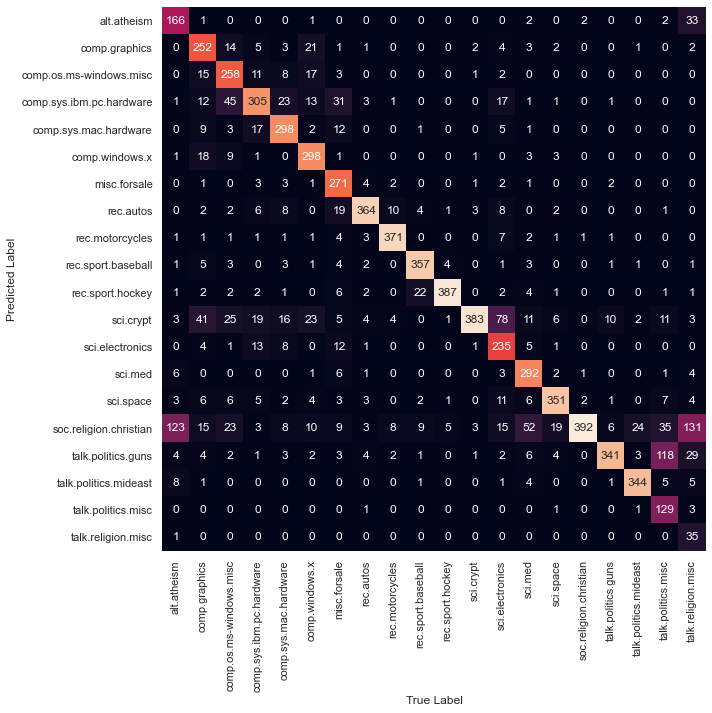

In [16]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)

fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
           xticklabels=train.target_names, 
           yticklabels=train.target_names)

plt.xlabel('True Label')
plt.ylabel('Predicted Label');

#### Make Function to Catagorize New News

In [19]:
def predicted_catagory(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

predicted_catagory('Indonesian Politics is messy')

'talk.politics.mideast'

#### Check Accuracy Model

In [20]:
print('Accuracy : ',model.score(test.data, test.target))

Accuracy :  0.7738980350504514


## Implementation in Iris Data

#### Import Library and Load Data

In [21]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import pandas as pd

iris = load_iris(as_frame = True)
X, y = (iris.data, iris.target)
iris.frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


#### Split Data

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
print("Jumlah Training Data : ", len(X_train), " | Jumlah Test Data : ", len(X_test))

Jumlah Training Data :  112  | Jumlah Test Data :  38


#### Make Model

In [30]:
clf = GaussianNB()
clf.fit(X_train, y_train)
clf.get_params()

{'priors': None, 'var_smoothing': 1e-09}

#### Predict Test Data

In [31]:
y_pred = clf.predict(X_test)
print(pd.DataFrame({'Prediction Label' : iris.target_names[y_pred],
              'Actual Label': iris.target_names[y_test]}))

   Prediction Label Actual Label
0         virginica    virginica
1        versicolor   versicolor
2            setosa       setosa
3         virginica    virginica
4            setosa       setosa
5         virginica    virginica
6            setosa       setosa
7        versicolor   versicolor
8        versicolor   versicolor
9        versicolor   versicolor
10        virginica    virginica
11       versicolor   versicolor
12       versicolor   versicolor
13       versicolor   versicolor
14       versicolor   versicolor
15           setosa       setosa
16       versicolor   versicolor
17       versicolor   versicolor
18           setosa       setosa
19           setosa       setosa
20        virginica    virginica
21       versicolor   versicolor
22           setosa       setosa
23           setosa       setosa
24        virginica    virginica
25           setosa       setosa
26           setosa       setosa
27       versicolor   versicolor
28       versicolor   versicolor
29        

#### Check Accuracy

In [32]:
print('Accuracy: ',clf.score(X_train, y_train))

Accuracy:  0.9464285714285714


#### Confusion Matrix

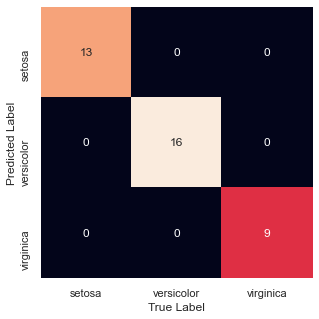

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(5,5)) 
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False,
           xticklabels=iris.target_names, 
           yticklabels=iris.target_names)

plt.xlabel('True Label')
plt.ylabel('Predicted Label');

#### Predict New Data
Misalnya kita memiliki bunga dengan sepal_length = 0.4, sepal_width = 1, petal_length = 2.3, dan petal_width = 2.5

In [35]:
predict = clf.predict([[0.4,1,2.3,2.5]])
iris.target_names[predict][0]

'virginica'